In [1]:
import numpy as np
from DataPreparation import read_data, basic_info, prior_distribution, features_histograms
from DataPreparation import visualize_continuous_data,  visualize_categorical_data, HoeffdingCheck
from CovarianceAnalysis import numerical_correlation_matrix, categorical_correlation_matrix, mix_correlation_matrix

### Read the Data

In [2]:
x_train_d, y_train_d = read_data()

# show top 5 rows of the dataset
x_train_d.head()


,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport
0,Female,-0.988720,-1.167028,-1.764740,yes,-0.790499,-1.636005,no,no,-2.177418,Frequently,yes,no,-1.188654,2.215954,Public_Transportation
1,Female,-0.973926,0.236118,-1.386181,yes,-2.556753,-1.636005,Sometimes,no,1.659010,Frequently,no,no,1.159596,0.570445,Public_Transportation
2,Male,-1.086665,1.161284,-1.051888,yes,0.111885,-0.011022,no,no,1.357276,Sometimes,yes,no,1.159596,0.455344,Automobile
3,Female,-0.851192,-1.760487,-1.701545,yes,0.630864,-1.140531,Sometimes,no,-1.968024,Sometimes,no,no,-0.891730,0.572757,Public_Transportation
4,Female,-0.651089,-1.819401,-1.689028,yes,1.074012,-1.111673,Sometimes,no,-2.177418,Frequently,no,no,-1.188654,-0.287398,Public_Transportation


### Basic information about the data

In [3]:
basic_info(x_train_d, y_train_d)

Number of samples,1180
Number of features,16
Number of classes,4


Gender,
Age,
Height,
Weight,
H_Cal_Consump,
Veg_Consump,
Water_Consump,
Alcohol_Consump,
Smoking,
Meal_Count,
Food_Between_Meals,


### Investigate Feature Distributions

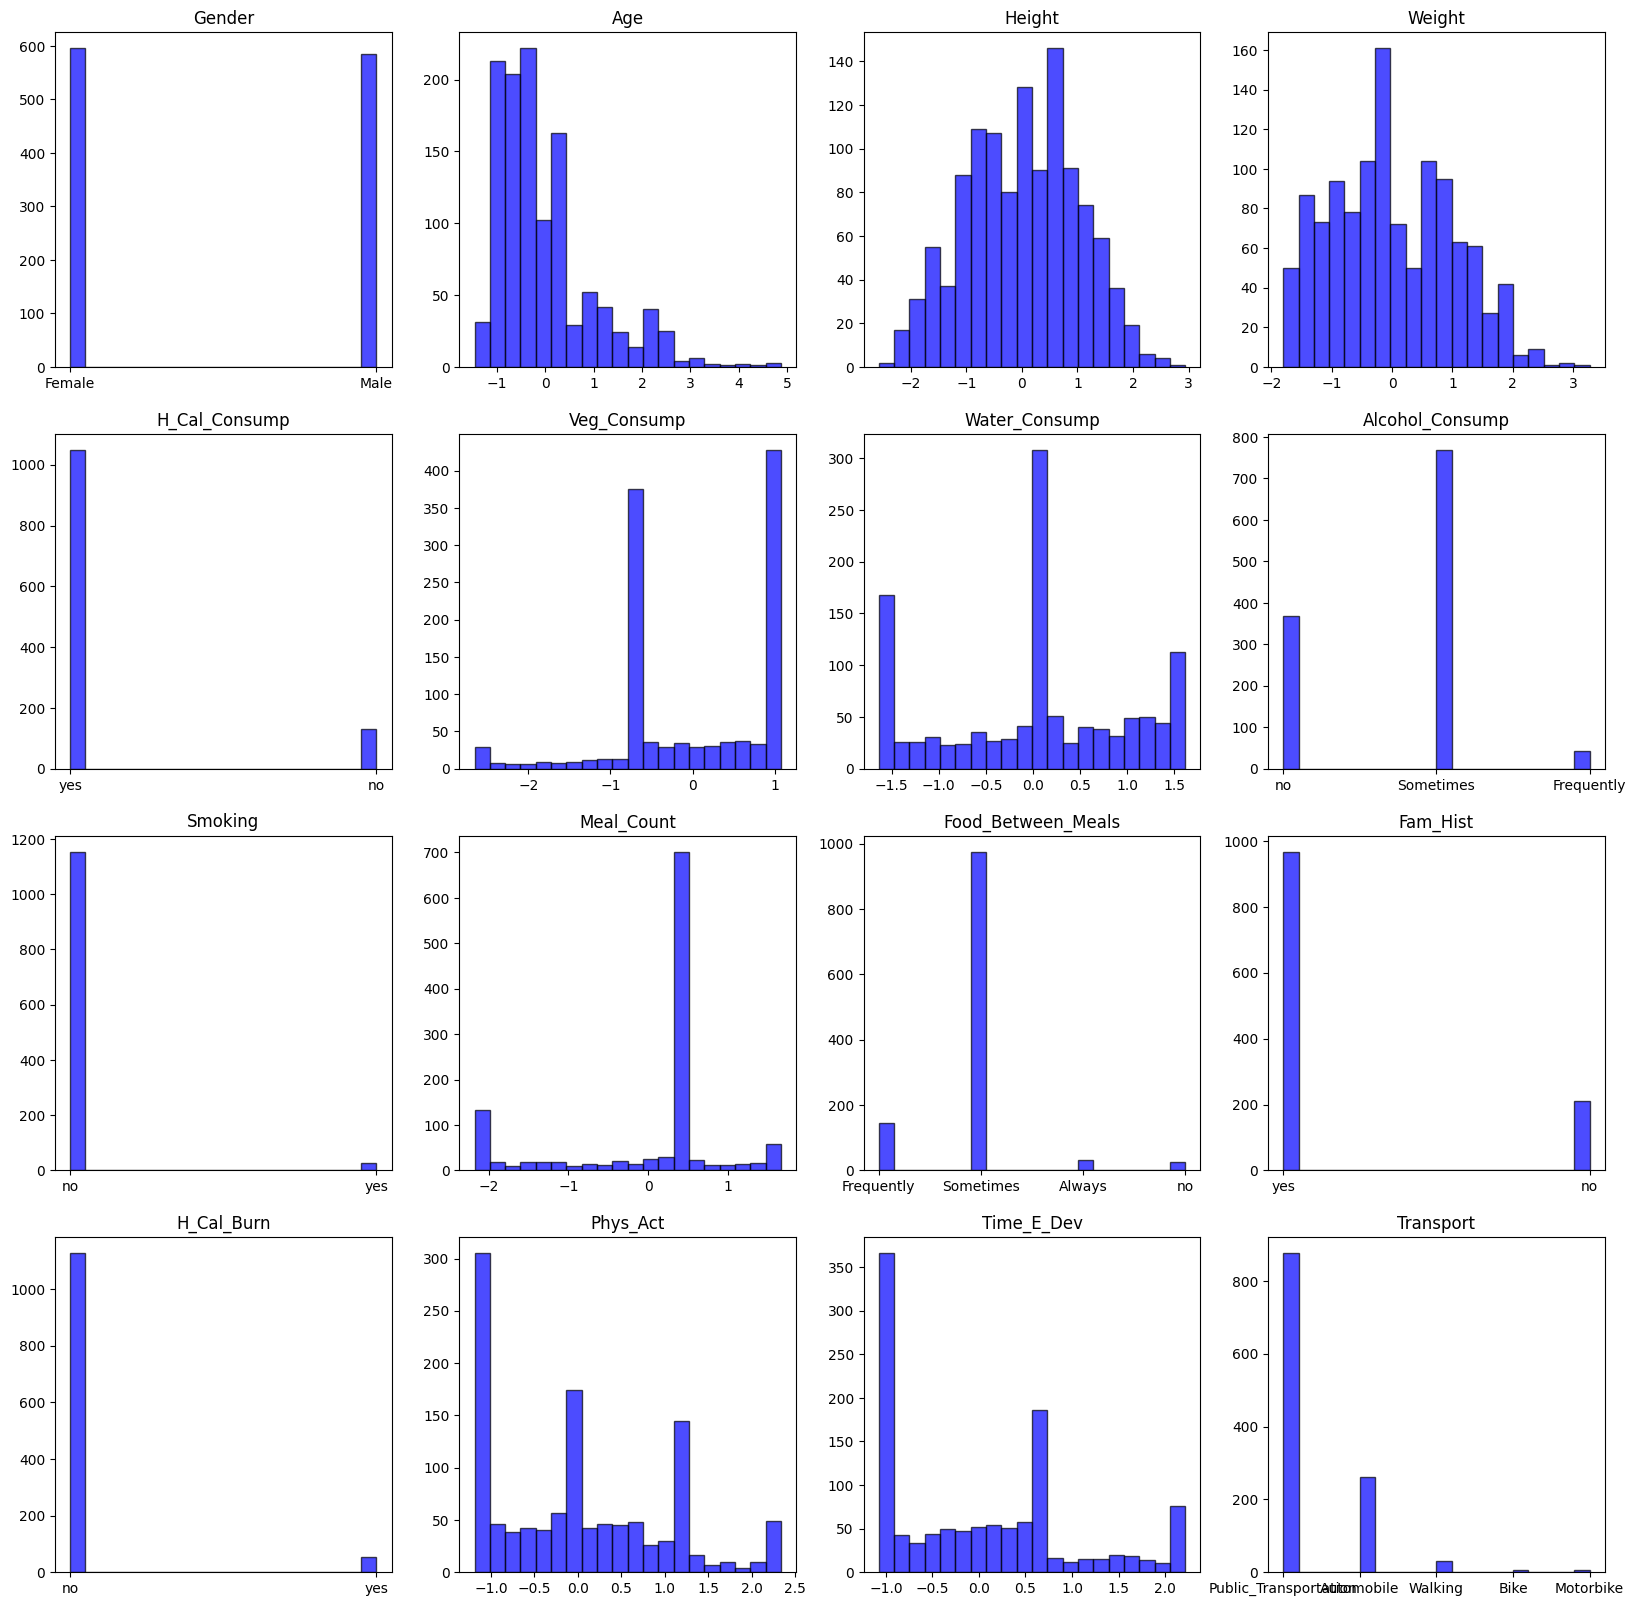


Number of unique values of each feature:



Gender,2
Age,numerical
Height,numerical
Weight,numerical
H_Cal_Consump,2
Veg_Consump,numerical
Water_Consump,numerical
Alcohol_Consump,3
Smoking,2
Meal_Count,numerical
Food_Between_Meals,4


Number of Categorical,8
Number of Numerical,8


In [4]:
features_histograms(x_train_d)

### Investigate Class Imbalance

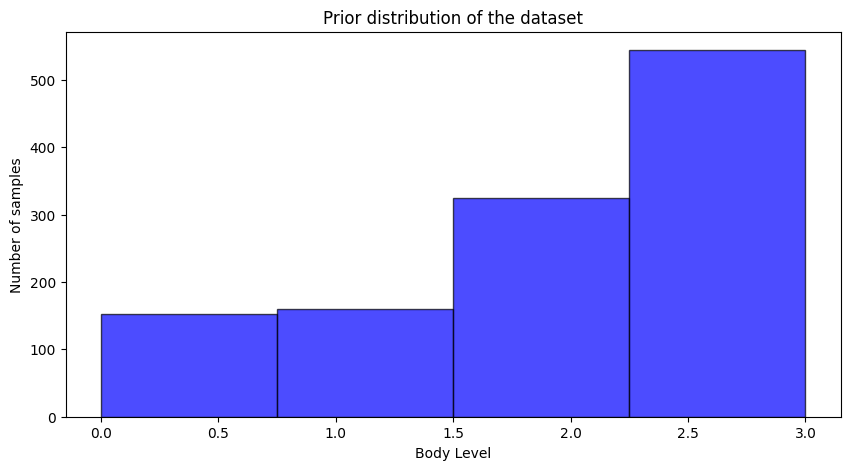

Class 0,152
Class 1,160
Class 2,324
Class 3,544


In [5]:
prior_distribution(y_train_d)

### Analyze potential in the continuous features

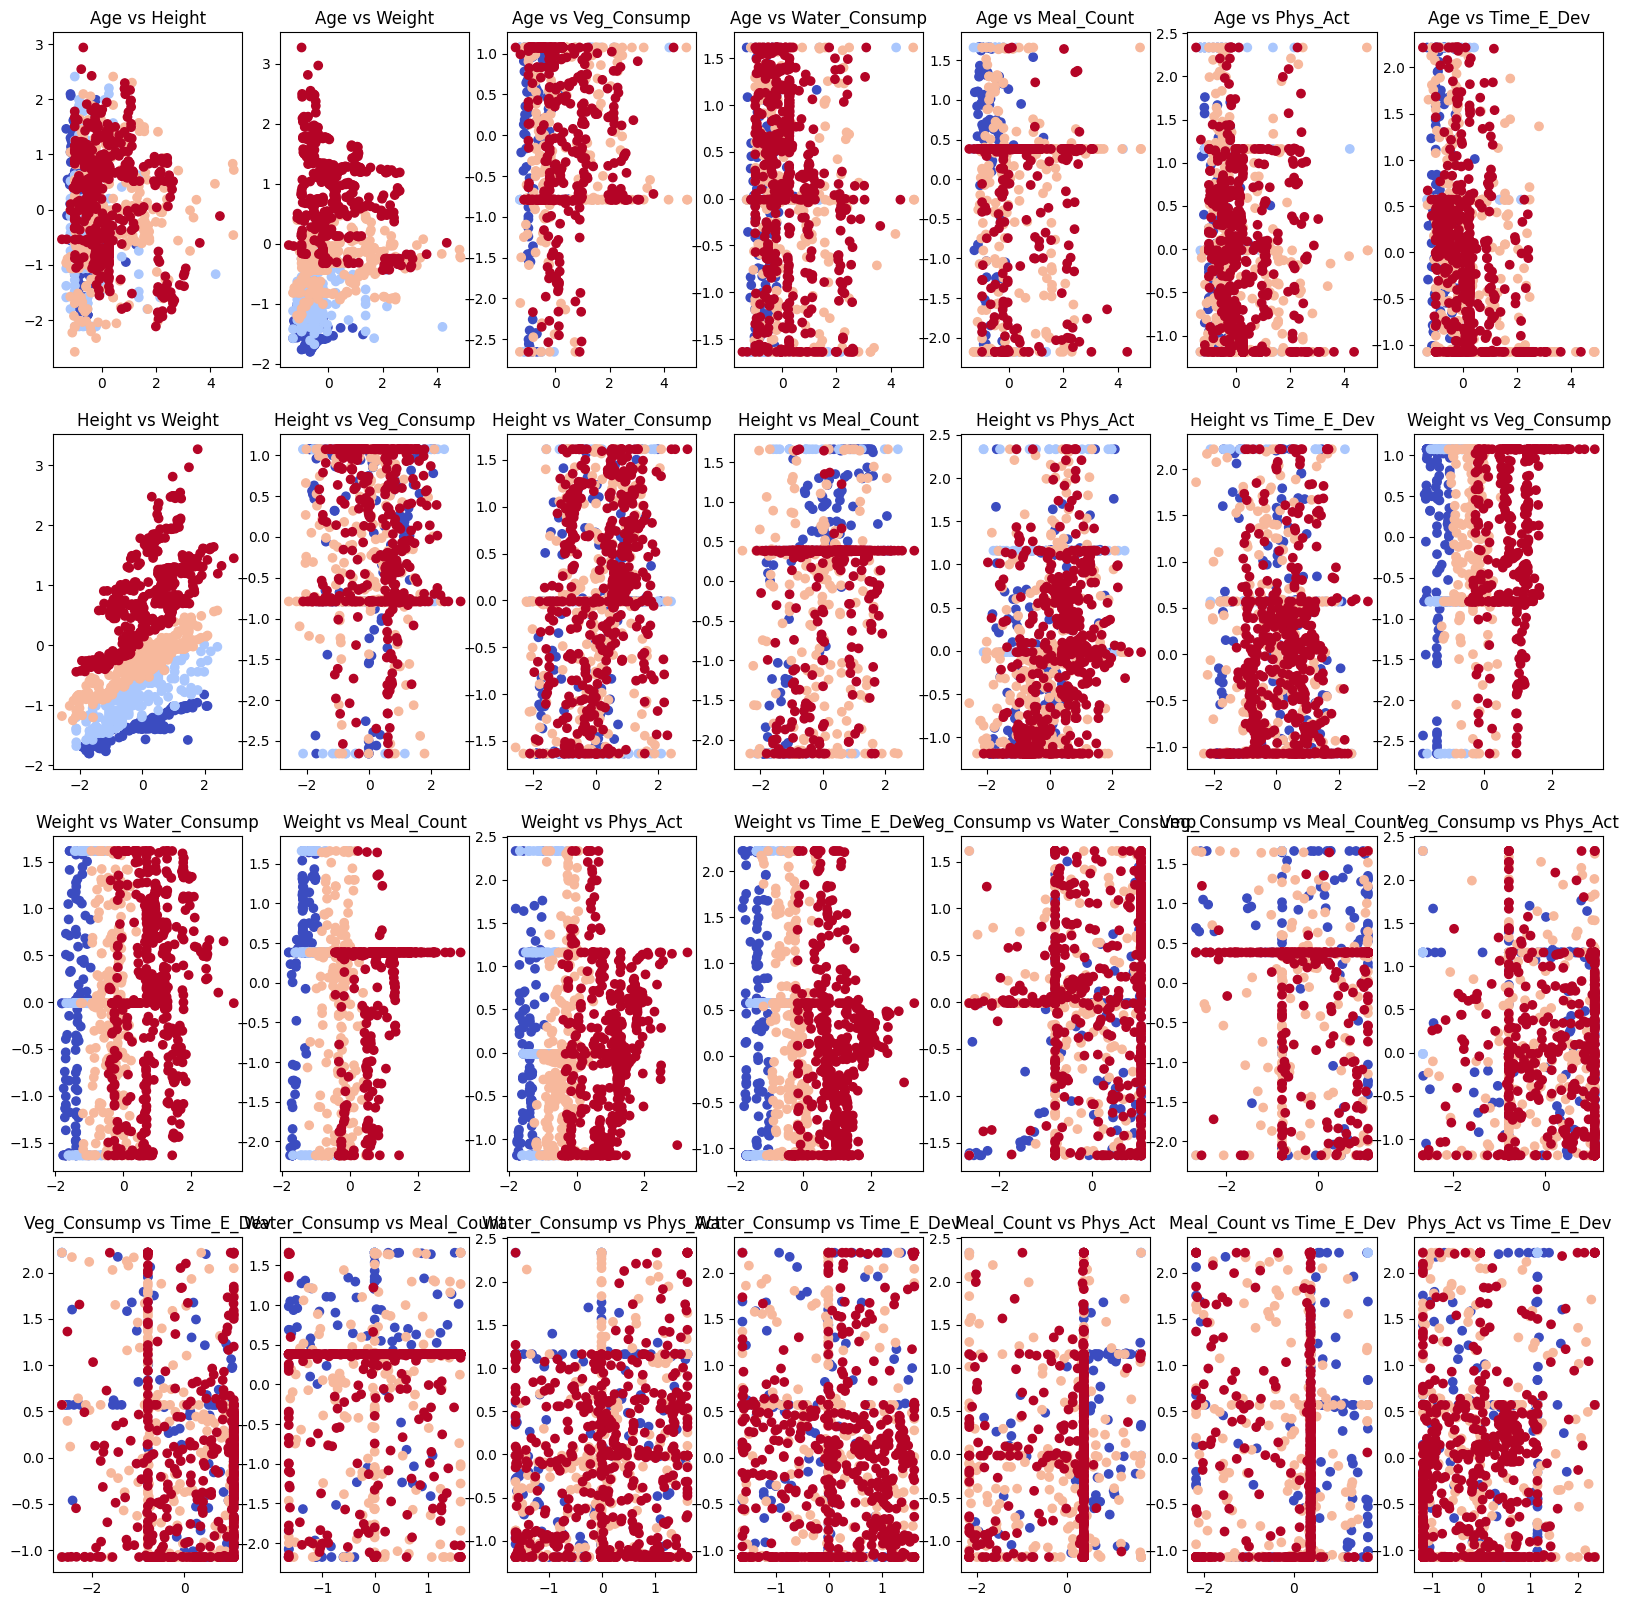

'\nWeights VS. Height is interesting, perhaps. Overall there seem to be potential in making a good classifier.\n'

In [6]:
visualize_continuous_data(x_train_d, y_train_d)
'''
Weights VS. Height is interesting, perhaps. Overall there seem to be potential in making a good classifier.
'''

### Analyze potential in the continuous features

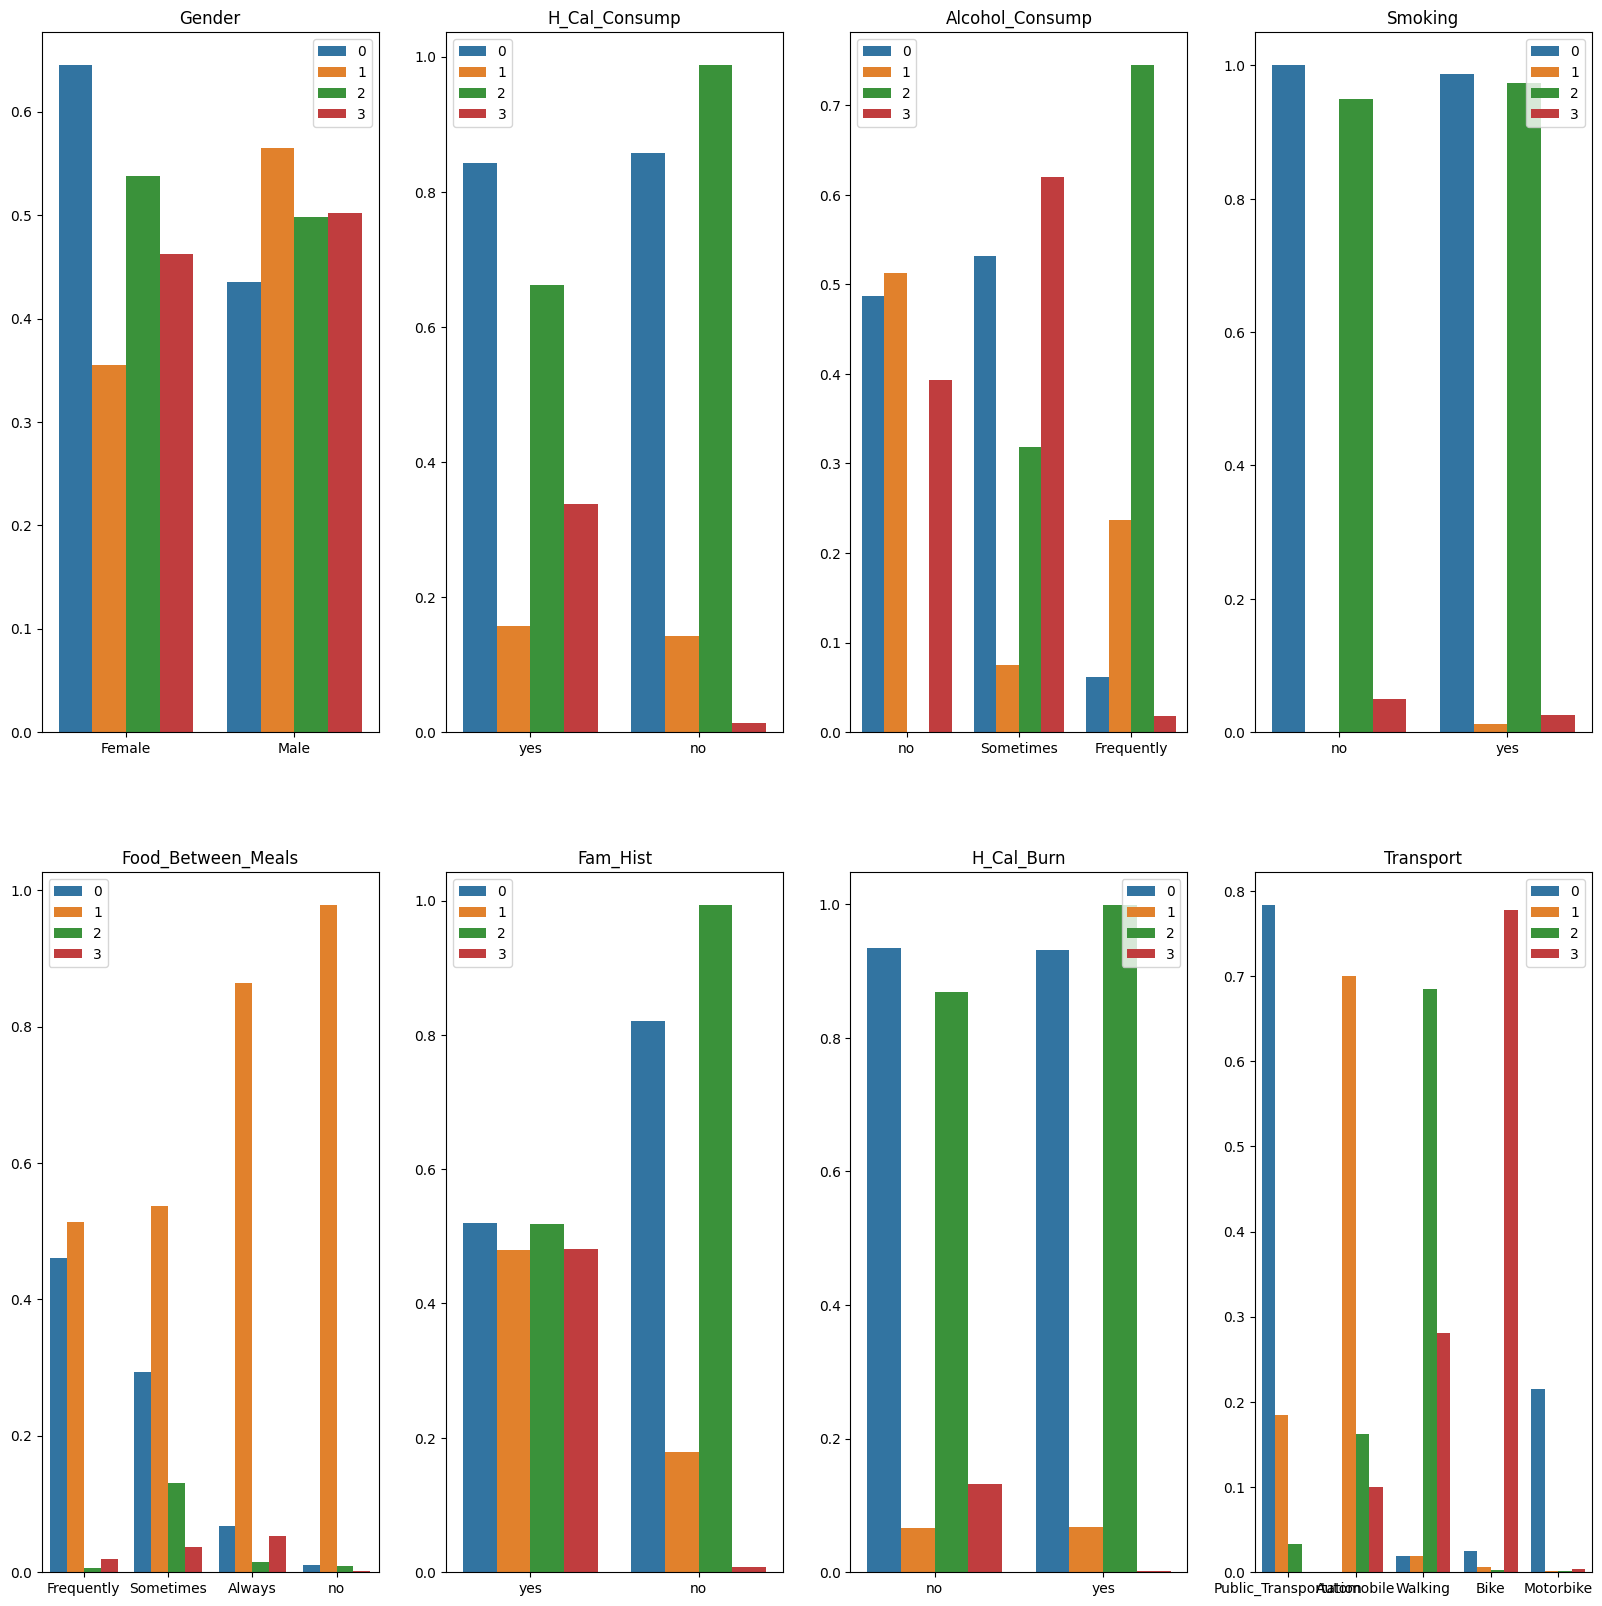

In [7]:
visualize_categorical_data(x_train_d, y_train_d, normalize=True)

### Analyze correlation between continuous features

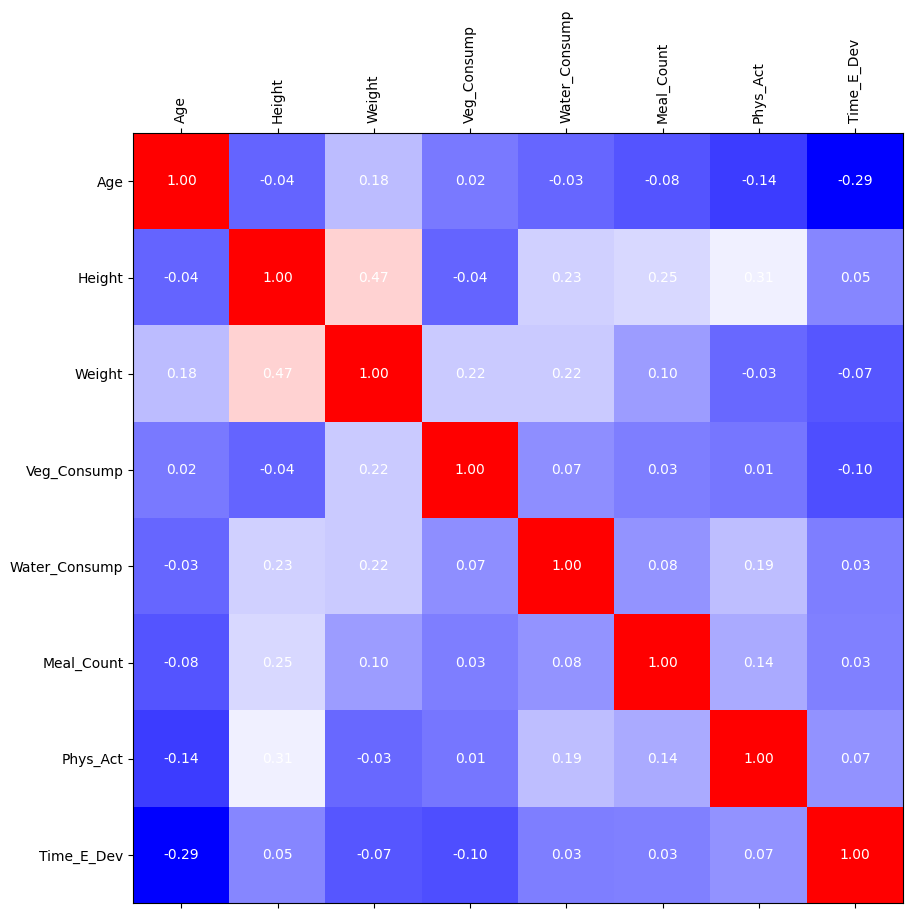

In [8]:
numerical_correlation_matrix(x_train_d)

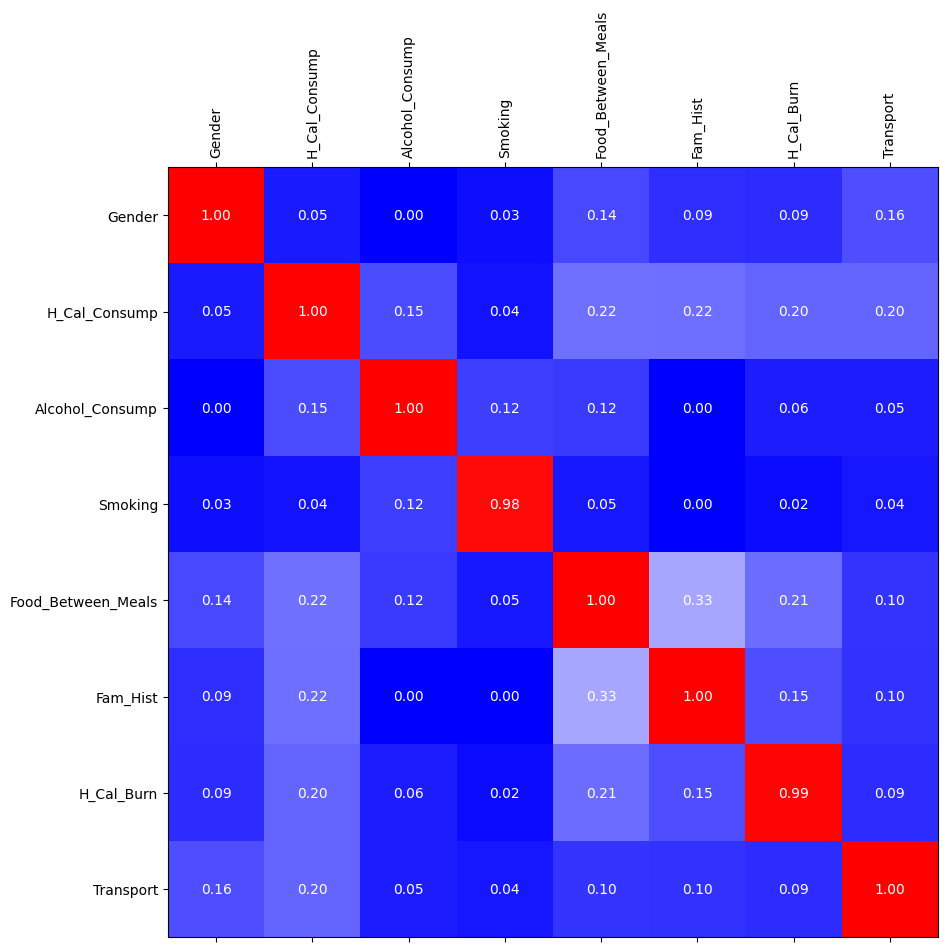

In [9]:
categorical_correlation_matrix(x_train_d)

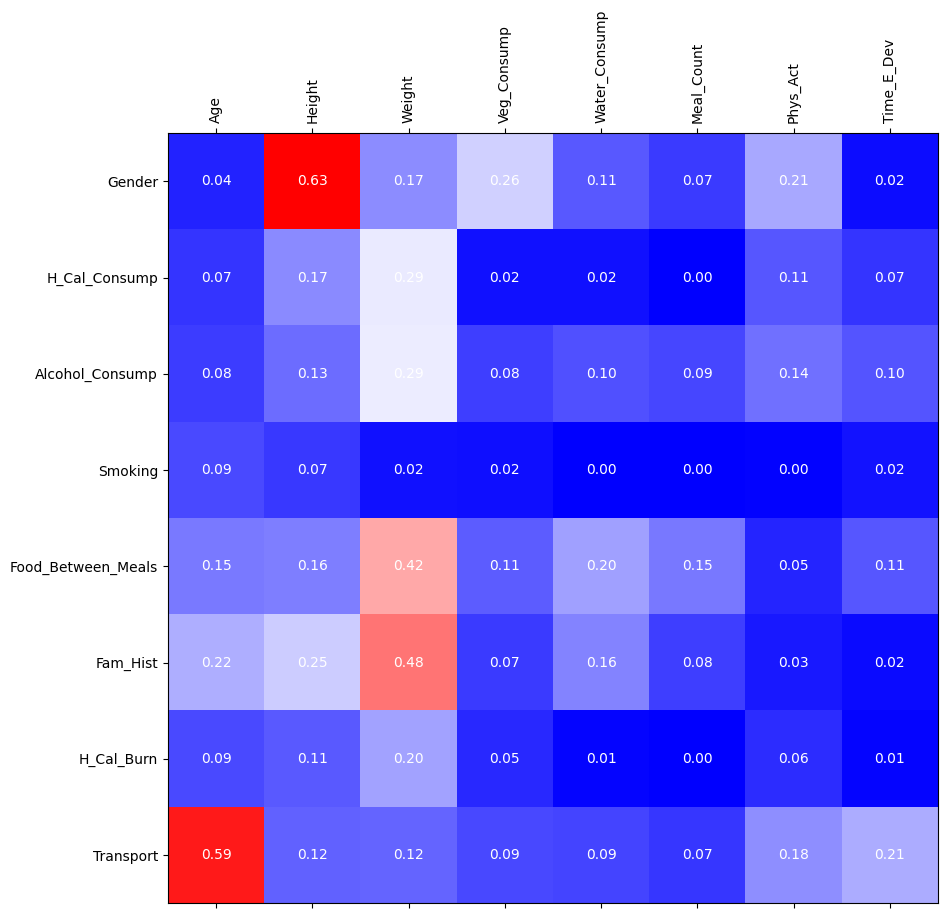

'\nMales seem on average taller than females and older ages perhaps do more transport.\n'

In [10]:
mix_correlation_matrix(x_train_d)
'''
Males seem on average taller than females and older ages perhaps do more transport.
'''

### Validation Set Size

In [12]:
x_data_d, y_data_d = read_data(split="all")
HoeffdingCheck(x_data_d, ratio=0.2, ϵ = 0.06)

<font size=4>Hoeffding's Inequality states:
                    $$P[|E_{out}(g)-E_{test}(g)| \leq \epsilon] \geq 1-2e^{-2N_{test}\epsilon^2}$$
                    If we use validation set of size $0.2N_{train}=295$ then with $\epsilon=0.06$ we have 
                    $$P[|E_{out}(g)-E_{test}(g)| \leq 0.06] \geq 0.762$$
                    In other words, 
                    with probability at least $0.762$, the generalization error of our model will be at most 0.06 given a validation set of size 295.
                    </font>
                    